# German dataset

In [1]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# params
seed = 42

## 1. Подгрузка данных

[Ссылка на скачивание](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))

Самый популярный, но довольно маленький датасет. Подгружаю только из-за отсутствия необходимости делать какие-то преобразования: многое уже подчищено.

Показатели из других работ:

| Paper |ACC | AUC | Gini |
| --- | --- | --- | --- | 
| Xia et al., 2018 | 0.7866 | 0.7997 | 0.5994 |
| Liu et al., 2021 | 0.7715 | 0.7933 | 0.5866 |
| Ala’raj & Abbod, 2016a, 2016b | 0.7772 | 0.8023 | 0.6046 |
| Arora & Kaur, 2020 | 0.84 | 0.713 | 0.4230 |
| Ashofteh & Bravo, 2021 | - | 0.926 | 0.8520 |
| Bao et al., 2019 | 0.542 | 0.859 | 0.718 |
| Bequé & Lessmann, 2017 | 0.759 | 0.802 | 0.6040 |
| Carta et al., 2020 | 0.73 | 0.89 | 0.7800 |
| Engelmann & Lessmann, 2021 | - | 0.7605 | 0.5210 |
| Hayashi, 2016 | 0.7522 | 0.692 | 0.3840 |
| He et al., 2018 | 0.7725 | 0.8034 | 0.6068 |
| Lan et al., 2020 | 0.676 | 0.686 | 0.3720 |
| Lappas & Yannacopoulos, 2021 | - | 0.7970 | 0.5940 |
| Liu et al., 2021 | 0.7376 | 0.7561 | 0.5122 |
| Melo Junior et al., 2020 | 0.69 | 0.75 | 0.5000 |
| Shen et al., 2019, 2021 | - | 0.8032 | 0.6064 |
| Tripathi et al., 2020 | 0.8760 | 0.8538 | 0.7076 |
| Zhang et al., 2018a, 2019, 2021a, 2021b |  0.77000 | 0.82999 | 0.65998 |


In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',
                 header = None, sep = ' ')

# based on the .doc data description
df.columns = ['cheq_acc', 'dur_t', 'cred_hist', 'purp', 'cred_amt', 'save_acc', 
              'empl_t', 'inst_to_income', 'pers_status', 'guarant_flg',
              'residence_t', 'prop', 'age', 'inst_plan', 'house', 'n_loans',
              'job', 'n_depend', 'tel_flg', 'foreign_flg', 'target']

df.head()

,cheq_acc,dur_t,cred_hist,purp,cred_amt,save_acc,empl_t,inst_to_income,pers_status,guarant_flg,...,prop,age,inst_plan,house,n_loans,job,n_depend,tel_flg,foreign_flg,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## 2. Анализ факторов

### Список факторов

| No. | Attribute | Type | Description | Values (if qualitative)
| -:- | --- | --- | --- | ---
| 0 | target | binary | Default (2) or non-default (1) | 
| 1 | cheq_acc | qualitative | Status of existing checking account | A11 : ... < 0 DM
|  |  |  |  | A12 : 0 <= ... < 200 DM
|  |  |  |  | A13 : ... >= 200 DM / salary assignments for at least 1 year
|  |  |  |  | A14 : no checking account
| 2 | dur_t | numerical | Duration in month | 
| 3 | cred_hist | qualitative | Credit history | A30 : no credits taken/ all credits paid back duly
|  |  |  |  | A31 : all credits at this bank paid back duly
|  |  |  |  | A32 : existing credits paid back duly till now
|  |  |  |  | A33 : delay in paying off in the past
|  |  |  |  | A34 : critical account/ other credits existing (not at this bank)
| 4 | purp | qualitative | Purpose | A40 : car (new)
|  |  |  |  | A41 : car (used)
|  |  |  |  | A42 : furniture/equipment
|  |  |  |  | A43 : radio/television
|  |  |  |  | A44 : domestic appliances
|  |  |  |  | A45 : repairs
|  |  |  |  | A46 : education
|  |  |  |  | A47 : (vacation - does not exist?)
|  |  |  |  | A48 : retraining
|  |  |  |  | A49 : business
|  |  |  |  | A410 : others
| 5 | cred_amt | numerical | Credit amount | 
| 6 | save_acc | qualitative | Savings account/bonds | A61 : ... < 100 DM
|  |  |  |  | A62 : 100 <= ... < 500 DM
|  |  |  |  | A63 : 500 <= ... < 1000 DM
|  |  |  |  | A64 : .. >= 1000 DM
|  |  |  |  | A65 : unknown/ no savings account
| 7 | empl_t | qualitative | Present employment since | A71 : unemployed
|  |  |  |  | A72 : ... < 1 year
|  |  |  |  | A73 : 1 <= ... < 4 years
|  |  |  |  | A74 : 4 <= ... < 7 years
|  |  |  |  | A75 : .. >= 7 years
| 8 | inst_to_income | numerical | Installment rate in percentage of disposable income | 
| 9 | pers_status | qualitative | Personal status and sex | A91 : male : divorced/separated
|  |  |  |  | A92 : female : divorced/separated/married
|  |  |  |  | A93 : male : single
|  |  |  |  | A94 : male : married/widowed
|  |  |  |  | A95 : female : single
| 10 | guarant_flg | qualitative | Other debtors / guarantors | A101 : none
|  |  |  |  | A102 : co-applicant
|  |  |  |  | A103 : guarantor
| 11 | residence_t | numerical | Present residence since | 
| 12 | prop | qualitative | Property | A121 : real estate
|  |  |  |  | A122 : if not A121 : building society savings agreement/ life insurance
|  |  |  |  | A123 : if not A121/A122 : car or other, not in attribute 6
|  |  |  |  | A124 : unknown / no property
| 13 | age | numerical | Age in years | 
| 14 | inst_plan | qualitative | Other installment plans | A141 : bank
|  |  |  |  | A142 : stores
|  |  |  |  | A143 : none
| 15 | house | qualitative | Housing | A151 : rent
|  |  |  |  | A152 : own
|  |  |  |  | A153 : for free
| 16 | n_loans | numerical | Number of existing credits at this bank | 
| 17 | job | qualitative | Job | A171 : unemployed/ unskilled - non-resident
|  |  |  |  | A172 : unskilled - resident
|  |  |  |  | A173 : skilled employee / official
|  |  |  |  | A174 : management/ self-employed/ highly qualified employee/ officer
| 18 | n_depend | numerical | Number of people being liable to provide maintenance for | 
| 19 | tel_flg | qualitative | Telephone | A191 : none
|  |  |  |  | A192 : yes, registered under the customers name
| 20 | foreign_flg | qualitative | foreign worker | A201 : yes
|  |  |  |  | A202 : no




Очевидно, что мы имеем большое число категориальных переменных. В дальнейшем мы заменим их при помощи WOE-преобразования. На данный момент лишь сформируем разбивку train vs. test и запишем список переменных

In [4]:
X = df.loc[:, df.columns != 'target']
y = df.target - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir samples
X_train.to_parquet('./samples/X_train.parquet')
X_test.to_parquet('./samples/X_test.parquet')
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet('./samples/y_train.parquet')
pd.DataFrame(y_test).to_parquet('./samples/y_test.parquet')

# сохраняем списки категориальных и колич. переменных
cat_vals = ['cheq_acc', 'cred_hist', 'purp', 'save_acc', 
            'empl_t', 'pers_status', 'guarant_flg', 'prop', 
            'inst_plan', 'house', 'job', 'tel_flg', 'foreign_flg']
num_vals = ['dur_t', 'cred_amt', 'inst_to_income', 'residence_t', 
            'age', 'n_loans', 'n_depend']

with open('factors.json', 'w') as f:
    json.dump({'cat_vals': cat_vals, "num_vals": num_vals}, f)

Џ®¤Ї ЇЄ  Ё«Ё д ©« samples г¦Ґ бгйҐбвўгҐв.


## 3. Статистики и пропуски

### Статистики

In [5]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий: {y.sum()}')
print(f'Доля целевых событий: {y.sum() / X.shape[0] * 100}%')

Количество наблюдений: 1000
Количество факторов: 20
Количество целевых событий: 300
Доля целевых событий: 30.0%


### Пропуски

Пропуски в датасете отсутствуют:

In [6]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {X[col].isna().sum() / df.shape[1] * 100}%')

Количество пропусков по фактору cheq_acc:
	0 или 0.0%
Количество пропусков по фактору dur_t:
	0 или 0.0%
Количество пропусков по фактору cred_hist:
	0 или 0.0%
Количество пропусков по фактору purp:
	0 или 0.0%
Количество пропусков по фактору cred_amt:
	0 или 0.0%
Количество пропусков по фактору save_acc:
	0 или 0.0%
Количество пропусков по фактору empl_t:
	0 или 0.0%
Количество пропусков по фактору inst_to_income:
	0 или 0.0%
Количество пропусков по фактору pers_status:
	0 или 0.0%
Количество пропусков по фактору guarant_flg:
	0 или 0.0%
Количество пропусков по фактору residence_t:
	0 или 0.0%
Количество пропусков по фактору prop:
	0 или 0.0%
Количество пропусков по фактору age:
	0 или 0.0%
Количество пропусков по фактору inst_plan:
	0 или 0.0%
Количество пропусков по фактору house:
	0 или 0.0%
Количество пропусков по фактору n_loans:
	0 или 0.0%
Количество пропусков по фактору job:
	0 или 0.0%
Количество пропусков по фактору n_depend:
	0 или 0.0%
Количество пропусков по фактору tel_fl

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cheq_acc        1000 non-null   object
 1   dur_t           1000 non-null   int64 
 2   cred_hist       1000 non-null   object
 3   purp            1000 non-null   object
 4   cred_amt        1000 non-null   int64 
 5   save_acc        1000 non-null   object
 6   empl_t          1000 non-null   object
 7   inst_to_income  1000 non-null   int64 
 8   pers_status     1000 non-null   object
 9   guarant_flg     1000 non-null   object
 10  residence_t     1000 non-null   int64 
 11  prop            1000 non-null   object
 12  age             1000 non-null   int64 
 13  inst_plan       1000 non-null   object
 14  house           1000 non-null   object
 15  n_loans         1000 non-null   int64 
 16  job             1000 non-null   object
 17  n_depend        1000 non-null   int64 
 18  tel_flg  

## 4. Визуальный анализ и выбросы

In [8]:
# adhoc
# поскольку все значения в German dataset отличны, можем менять их по единой маске:
cat_vals_mask = {
    "A11": "... < 0 DM",
    "A101": "none",
    "A102": "co-applicant",
    "A103": "guarantor",
    "A12": "0 <= ... < 200 DM",
    "A121": "real estate",
    "A122": "if not A121 ",
    "A123": "if not A121/A122 ",
    "A124": "unknown / no property",
    "A13": "... >= 200 DM / salary assignments for at least 1 year",
    "A14": "no checking account",
    "A141": "bank",
    "A142": "stores",
    "A143": "none",
    "A151": "rent",
    "A152": "own",
    "A153": "for free",
    "A171": "unemployed/ unskilled - non-resident",
    "A172": "unskilled - resident",
    "A173": "skilled employee / official",
    "A174": "management/ self-employed/ highly qualified employee/ officer",
    "A191": "none",
    "A192": "yes, registered under the customers name",
    "A201": "yes",
    "A202": "no",
    "A30": "no credits taken/ all credits paid back duly",
    "A31": "all credits at this bank paid back duly",
    "A32": "existing credits paid back duly till now",
    "A33": "delay in paying off in the past",
    "A34": "critical account/ other credits existing (not at this bank)",
    "A40": "car (new)",
    "A41": "car (used)",
    "A410": "others",
    "A42": "furniture/equipment",
    "A43": "radio/television",
    "A44": "domestic appliances",
    "A45": "repairs",
    "A46": "education",
    "A47": "(vacation - does not exist?)",
    "A48": "retraining",
    "A49": "business",
    "A61": "... < 100 DM",
    "A62": "100 <= ... < 500 DM",
    "A63": "500 <= ... < 1000 DM",
    "A64": ".. >= 1000 DM",
    "A65": "unknown/ no savings account",
    "A71": "unemployed",
    "A72": "... < 1 year",
    "A73": "1 <= ... < 4 years",
    "A74": "4 <= ... < 7 years",
    "A75": ".. >= 7 years",
    "A91": "male ",
    "A92": "female ",
    "A93": "male ",
    "A94": "male ",
    "A95": "female "
}

In [9]:
X_cat = X.replace(cat_vals_mask)

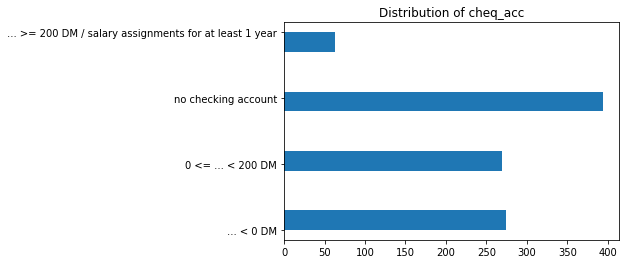

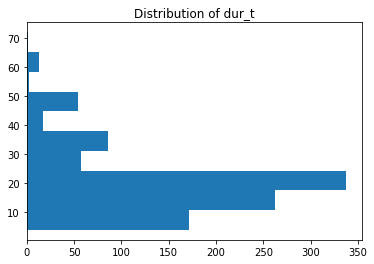

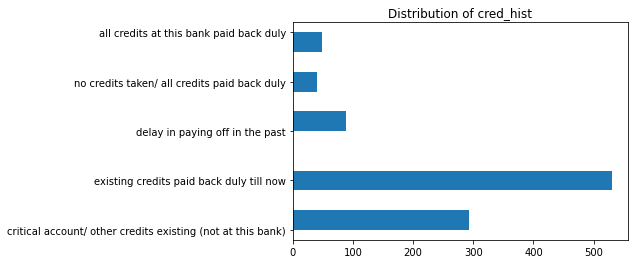

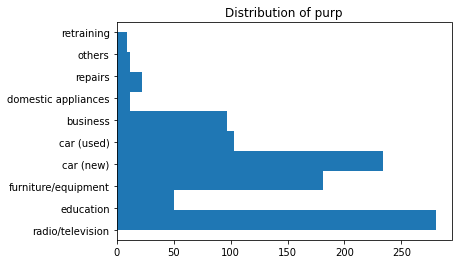

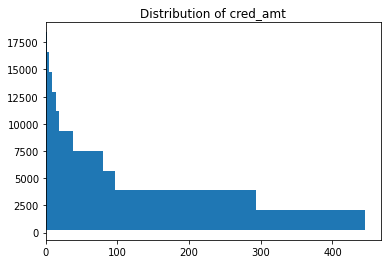

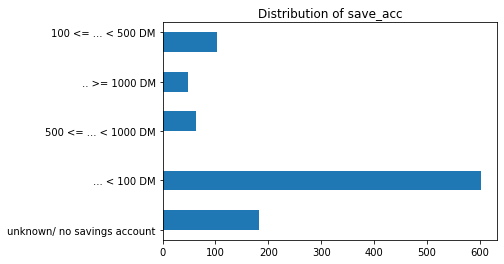

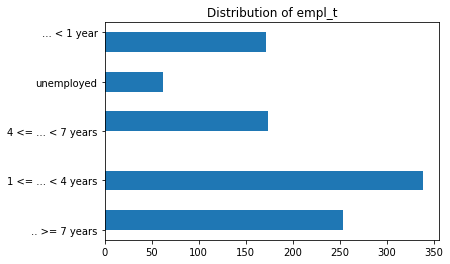

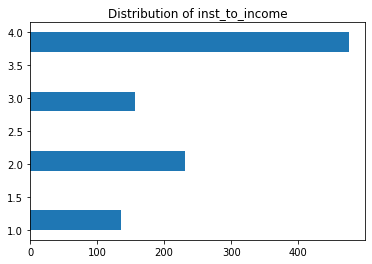

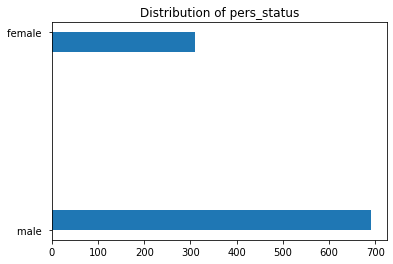

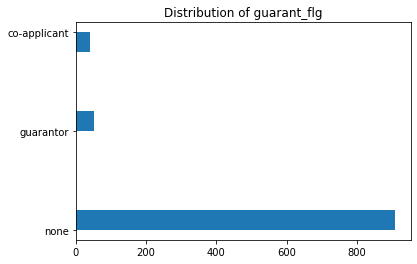

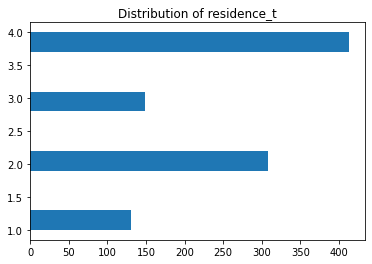

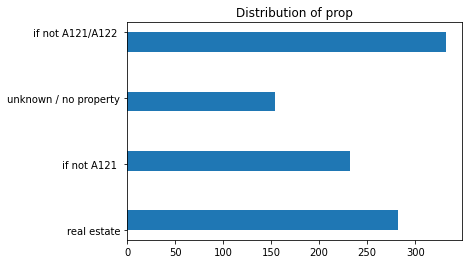

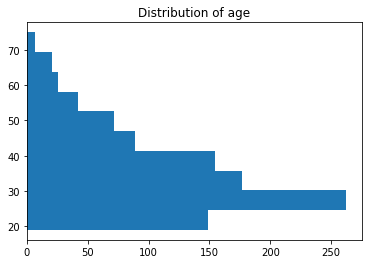

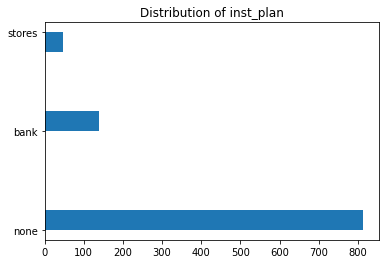

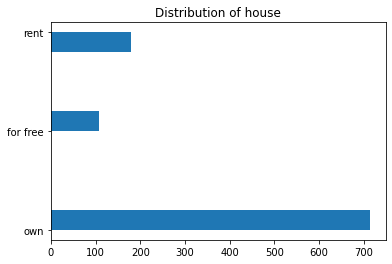

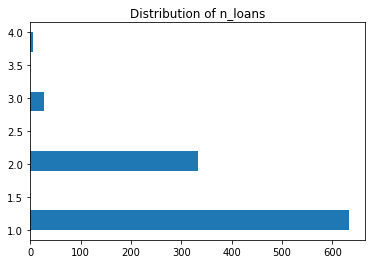

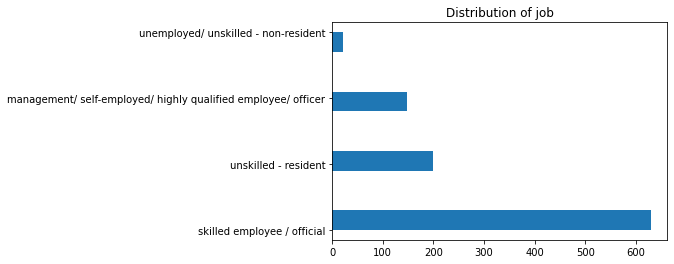

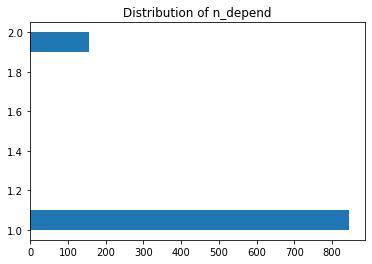

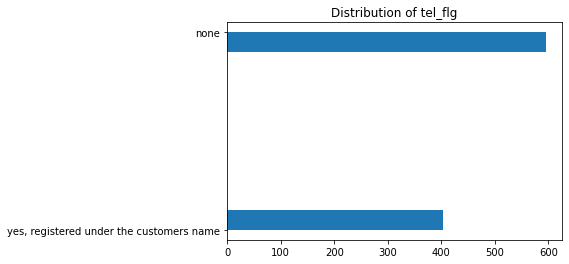

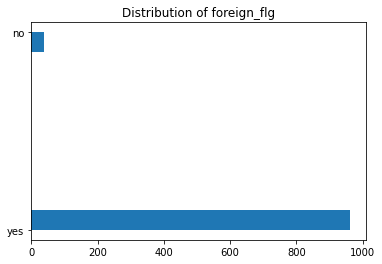

In [10]:
for col in X_cat.columns:
    plt.hist(X_cat[col], orientation='horizontal')
    plt.title(f'Distribution of {col}')
    plt.show()

### Анализ количественных переменных

В этом dataset есть также 7 количественных inputs и target - интересно отдельно посмотреть на их распределения и корелляции

In [15]:
describe = df.describe() #Basic describe
describe.loc['IQR'] = describe.loc['75%'] - describe.loc['25%'] #Adding IQR with the help of hint
describe = describe.append(df.reindex(describe.columns, axis=1).agg(['skew', 'mad', 'kurt'])) #Adding kurtosis, mad, and skew with the help of hint
describe

,dur_t,cred_amt,inst_to_income,residence_t,age,n_loans,n_depend,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000
IQR,12.000000,2606.750000,2.000000,2.000000,15.000000,1.000000,0.000000,1.000000
skew,1.094184,1.949628,-0.531348,-0.272570,1.020739,1.272576,1.909445,0.874183


Text(0.5, 0.98, 'German dataset')

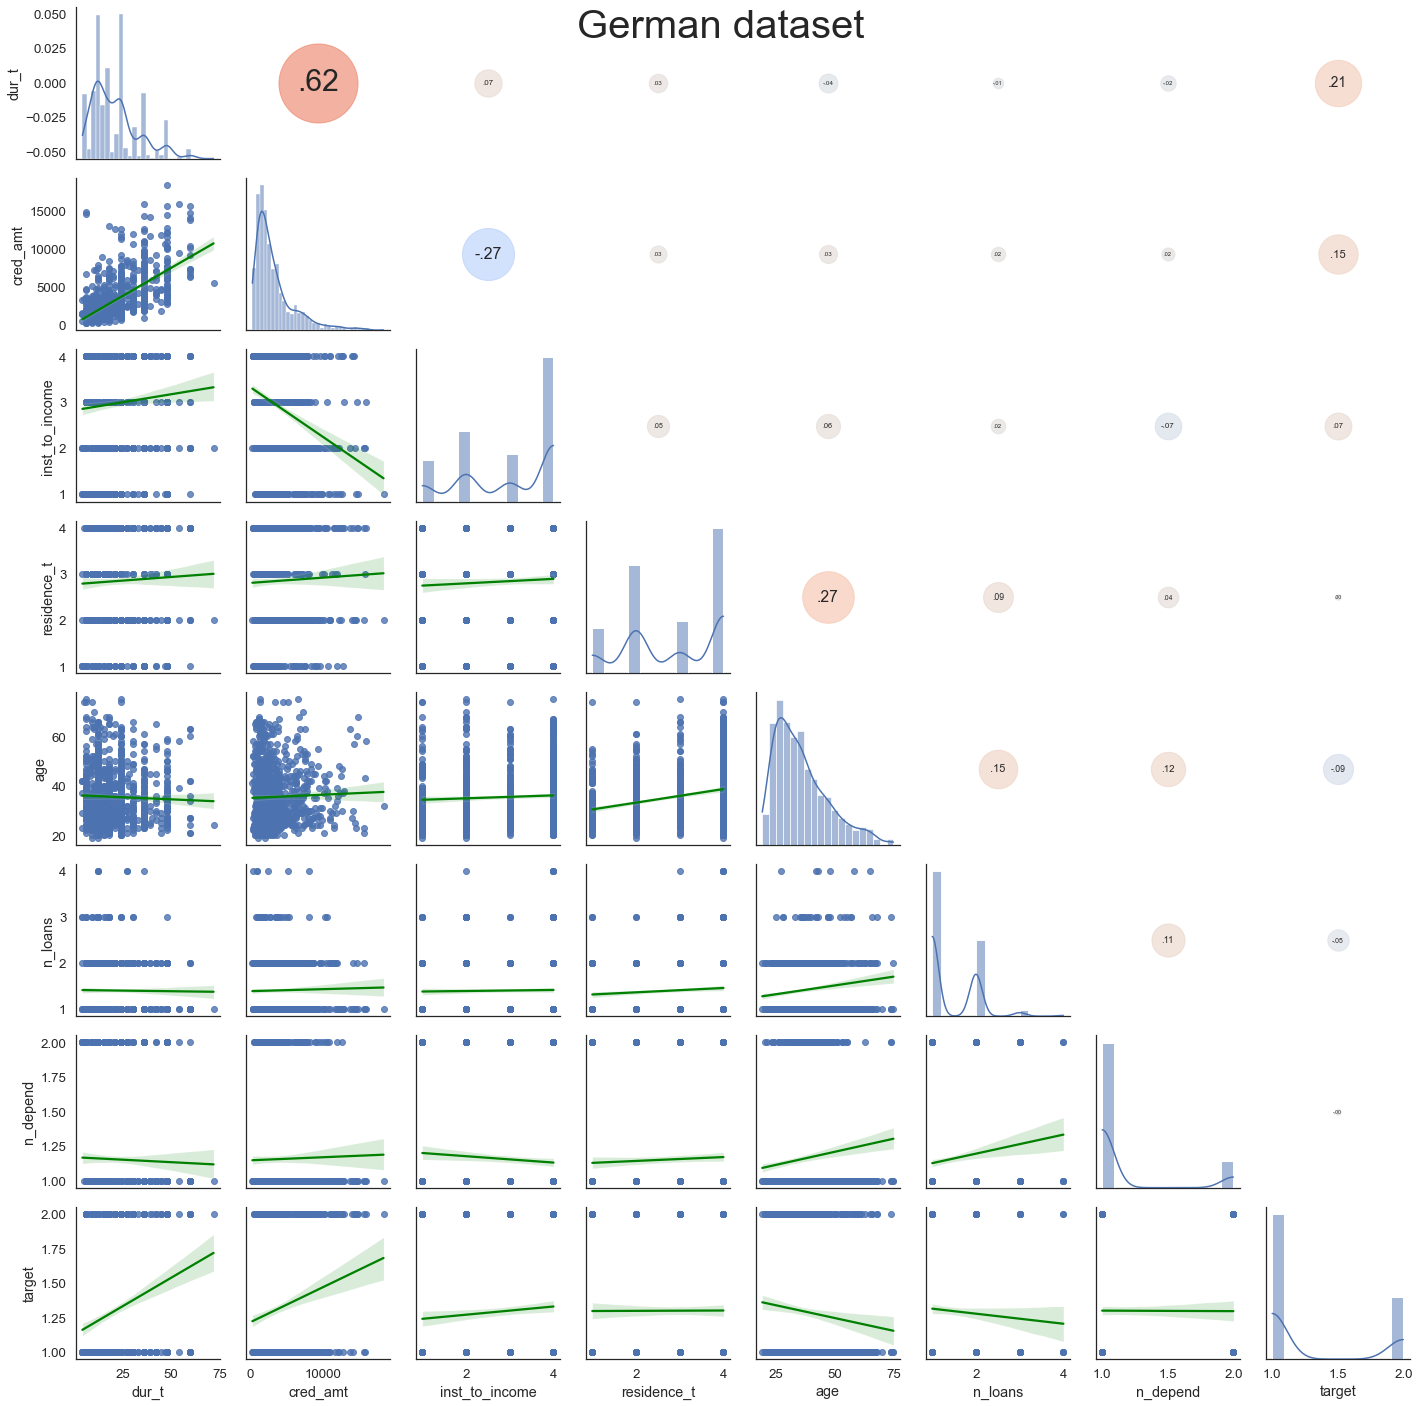

In [14]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000 #Size of circles depens on correlations
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes) #Color depend on corr
    font_size = abs(corr_r) * 40 + 5 #Font depend on correlation
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.2)
plot = sns.PairGrid(df, aspect=1, diag_sharey=False)
plot.map_lower(sns.regplot, line_kws={'color': 'green'})#Trends are linear and green with CI, so that to suspect nonlimearity
plot.map_diag(sns.histplot, kde=True)
plot.map_upper(corrdot)
plot.fig.suptitle("German dataset", size = 40) #Title

target слабо скореллирован с любым input, n_depend сильно непропорциональна, все переменные несимметричны, распределоение cred_amt и age похоже на логнормальное, выбросов действительно нет

### Выводы 

Все довольно предсказуемо. Критических выбросов не обнаружено. Почему-то большинство обращующихся за кредитом — иностранцы.